# Requirements 4 & 5: Credit Limit Analysis

---

## ANSWER TO REQUIREMENTS

**Requirement 4: Were any sales made to distributors without an established credit limit?**

**NO EXCEPTIONS FOUND.** All 1,158 sales transactions in 2017 were made to customers with established credit limits in the Customer Master file. All 73 distributors have documented credit limits ranging from $50,000 to $500,000.

**Requirement 5: Do any customers have AR balances exceeding their authorized credit limit as of 12/31/17?**

**NO EXCEPTIONS FOUND.** All 60 customers with outstanding AR balances as of December 31, 2017 are within their authorized credit limits. The highest credit utilization observed is 99.4% (Hurricane Hospital Supply with $397,715 AR against $400,000 limit).

### Key Findings:

- **Finding 1:** **Control #2 (Credit Limit Establishment) is EFFECTIVE** - All 73 distributors have established credit limits before sales occurred
- **Finding 2:** **Control #3 (Sales Authorization) is EFFECTIVE** - No sales were authorized that would cause customers to exceed credit limits
- **Finding 3:** **High credit utilization exists** - 10 customers (16.7% of those with AR) have credit utilization >80%, indicating potential collection risk even though limits not exceeded

### Credit Utilization Analysis:

- Customers with AR: 60 of 73 distributors (82.2%)
- Average credit utilization: 51.3%
- Customers >80% utilized: 10 (Hurricane Hospital Supply, Luckytechs, Griffintube, etc.)
- Customers <20% utilized: 17 (conservative credit management)

### Recommended Actions:

**Despite no exceptions, auditors should:**
- Review high-utilization customers (>80%) for collectibility concerns
- Consider whether credit limits are appropriate given Q4 2017 sales spike
- Test whether credit controls could have been overridden during roll-forward period
- Investigate if credit limits were increased during Q4 2017 to accommodate higher sales
- Confirm credit limits haven't been retroactively adjusted after year-end

---

## Data Sources

- `UMD_Data Set_Sales Orders.xlsx` - Sales transactions with credit approval flags
- `UMD_Data Set_Customer Master.xlsx` - Customer credit limits
- `UMD_Data Set_Customer Invoices.xlsx` - Invoice payment status for AR balances

## Outputs Generated

- `outputs/tables/sales_without_credit_limits.csv` - No exceptions found
- `outputs/tables/ar_exceeding_credit_limits.csv` - No exceptions found
- `outputs/tables/ar_credit_analysis_full.csv` - Complete AR analysis with utilization metrics
- `outputs/figures/credit_analysis.png` - Visualization of credit patterns and utilization


## Setup & Data Loading


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Add src to path for imports
sys.path.append(str(Path.cwd().parent))

from src.data_loader import UMDDataLoader

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f'${x:,.2f}' if abs(x) >= 1 else f'{x:.4f}')

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print("Libraries loaded successfully")


Libraries loaded successfully


In [2]:
# Initialize data loader and load all files
loader = UMDDataLoader(data_dir='../data')
loader.load_all_files()
loader.clean_data_types()

# Get dataframes
sales_orders = loader.get_dataframe('sales_orders')
customer_master = loader.get_dataframe('customer_master')
customer_invoices = loader.get_dataframe('customer_invoices')

print(f"Sales Orders: {len(sales_orders):,} records")
print(f"Customer Master: {len(customer_master):,} customers")
print(f"Customer Invoices: {len(customer_invoices):,} invoices")


2025-10-03 17:27:42,229 - src.data_loader - INFO - Attempting to load UMD_Data Set_Sales Orders.xlsx...
2025-10-03 17:27:42,230 - src.data_loader - INFO - File size: 138,506 bytes
2025-10-03 17:27:42,475 - src.data_loader - INFO - ✓ Successfully loaded 1,168 records from UMD_Data Set_Sales Orders.xlsx
2025-10-03 17:27:42,476 - src.data_loader - INFO -   Original columns: 16, Cleaned columns: 16
2025-10-03 17:27:42,476 - src.data_loader - INFO - Attempting to load UMD_Data Set_Shipments.xlsx...
2025-10-03 17:27:42,477 - src.data_loader - INFO - File size: 71,824 bytes
2025-10-03 17:27:42,559 - src.data_loader - INFO - ✓ Successfully loaded 1,165 records from UMD_Data Set_Shipments.xlsx
2025-10-03 17:27:42,559 - src.data_loader - INFO -   Original columns: 7, Cleaned columns: 7
2025-10-03 17:27:42,560 - src.data_loader - INFO - Attempting to load UMD_Data Set_Customer Invoices.xlsx...
2025-10-03 17:27:42,562 - src.data_loader - INFO - File size: 72,567 bytes
2025-10-03 17:27:42,641 - src

Sales Orders: 1,168 records
Customer Master: 73 customers
Customer Invoices: 1,167 invoices


## Requirement 4: Sales Without Credit Limits

**Control Being Tested:** The second control requires the credit department to conduct a detailed credit check for all new customers and establish a credit limit. We need to verify that no sales were made without an established credit limit.


In [3]:
# Examine customer master data to understand credit limit structure
print("Credit Limit Distribution in Customer Master:")
print("=" * 60)

# Check for NULL, zero, or missing credit limits
credit_limit_summary = customer_master['CredLimit'].describe()
print(f"\nCredit Limit Statistics:")
print(credit_limit_summary)

null_limits = customer_master['CredLimit'].isnull().sum()
zero_limits = (customer_master['CredLimit'] == 0).sum()
positive_limits = (customer_master['CredLimit'] > 0).sum()

print(f"\nCredit Limit Breakdown:")
print(f"  NULL/Missing credit limits: {null_limits}")
print(f"  Zero credit limits: {zero_limits}")
print(f"  Positive credit limits: {positive_limits}")
print(f"  Total customers: {len(customer_master)}")

# Show customers without credit limits
if null_limits > 0 or zero_limits > 0:
    no_credit_limit = customer_master[
        (customer_master['CredLimit'].isnull()) | 
        (customer_master['CredLimit'] == 0)
    ].copy()
    print(f"\nCustomers without established credit limits:")
    print(no_credit_limit[['CustID', 'CustName', 'TerritoryID', 'CredLimit']])


Credit Limit Distribution in Customer Master:

Credit Limit Statistics:
count        $73.00
mean    $240,410.96
std     $132,460.04
min      $50,000.00
25%     $100,000.00
50%     $250,000.00
75%     $250,000.00
max     $500,000.00
Name: CredLimit, dtype: float64

Credit Limit Breakdown:
  NULL/Missing credit limits: 0
  Zero credit limits: 0
  Positive credit limits: 73
  Total customers: 73


In [4]:
# Identify 2017 revenue transactions (invoiced in 2017)
# Merge sales orders with invoices to get invoice dates
sales_with_invoices = sales_orders.merge(
    customer_invoices[['InvoiceID', 'InvoiceDate']], 
    on='InvoiceID', 
    how='left'
)

# Filter for 2017 invoices
revenue_2017 = sales_with_invoices[
    (sales_with_invoices['InvoiceDate'].dt.year == 2017)
].copy()

print(f"Total 2017 revenue transactions: {len(revenue_2017):,}")
print(f"Total 2017 revenue: ${revenue_2017['SubTotal'].sum():,.2f}")


Total 2017 revenue transactions: 1,158
Total 2017 revenue: $84,867,855.00


In [11]:
# Merge 2017 sales with customer master to check credit limits
sales_with_credit = revenue_2017.merge(
    customer_master[['CustID', 'CustName', 'TerritoryID', 'CredLimit']], 
    on='CustID', 
    how='left',
    suffixes=('', '_Customer')
)

# Identify sales without credit limits (NULL or 0)
sales_no_credit_limit = sales_with_credit[
    (sales_with_credit['CredLimit'].isnull()) | 
    (sales_with_credit['CredLimit'] == 0)
].copy()

print("=" * 60)
print("REQUIREMENT 4 RESULTS: Sales Without Credit Limits")
print("=" * 60)

if len(sales_no_credit_limit) == 0:
    print("\nNO EXCEPTIONS FOUND")
    print("All 2017 sales were made to customers with established credit limits.")
else:
    print(f"\nEXCEPTIONS FOUND: {len(sales_no_credit_limit):,} transactions")
    print(f"Total value: ${sales_no_credit_limit['SubTotal'].sum():,.2f}")
    print(f"Percentage of 2017 revenue: {(sales_no_credit_limit['SubTotal'].sum() / revenue_2017['SubTotal'].sum()) * 100:.2f}%")
    
    # Summarize by customer
    print("\nBreakdown by Customer:")
    customer_summary = sales_no_credit_limit.groupby(['CustID', 'CustName']).agg({
        'SalesOrderID': 'count',
        'SubTotal': 'sum'
    }).rename(columns={'SalesOrderID': 'TransactionCount', 'SubTotal': 'TotalSales'})
    customer_summary = customer_summary.sort_values('TotalSales', ascending=False)
    print(customer_summary)
    
    # Summarize by territory
    print("\nBreakdown by Territory:")
    territory_summary = sales_no_credit_limit.groupby('TerritoryID').agg({
        'SalesOrderID': 'count',
        'SubTotal': 'sum'
    }).rename(columns={'SalesOrderID': 'TransactionCount', 'SubTotal': 'TotalSales'})
    territory_summary = territory_summary.sort_values('TotalSales', ascending=False)
    print(territory_summary)


REQUIREMENT 4 RESULTS: Sales Without Credit Limits

NO EXCEPTIONS FOUND
All 2017 sales were made to customers with established credit limits.


## Requirement 5: AR Balances Exceeding Credit Limits

**Control Being Tested:** The third control is an automated sales authorization that prevents sales when the customer's AR balance + new sale would exceed their credit limit. We need to check if any customers have AR balances exceeding their authorized credit limits as of 12/31/2017.


In [6]:
# Get AR balance as of 12/31/2017
# These are invoices that were outstanding on 12/31/2017
# (either still unpaid OR paid after 12/31/2017)

# Unpaid invoices (PaidDate = 9/9/9999)
unpaid_invoices = customer_invoices[~customer_invoices['IsPaid']].copy()

# Invoices paid in 2018 or later (but were in AR at year-end 2017)
paid_after_yearend = customer_invoices[
    (customer_invoices['IsPaid']) & 
    (customer_invoices['PaidDate'].dt.year >= 2018)
].copy()

# Combine to get all invoices that were in AR as of 12/31/2017
ar_dec_31_2017 = pd.concat([unpaid_invoices, paid_after_yearend], ignore_index=True)

# Filter for only 2017 invoices (can't be in AR on 12/31/17 if invoiced in 2018)
ar_dec_31_2017 = ar_dec_31_2017[ar_dec_31_2017['InvoiceDate'].dt.year == 2017].copy()

print(f"AR Invoices Outstanding as of 12/31/2017: {len(ar_dec_31_2017):,}")
print(f"  - Still unpaid: {len(unpaid_invoices[unpaid_invoices['InvoiceDate'].dt.year == 2017]):,}")
print(f"  - Paid in 2018+: {len(paid_after_yearend):,}")


AR Invoices Outstanding as of 12/31/2017: 148
  - Still unpaid: 31
  - Paid in 2018+: 120


In [7]:
# Merge AR invoices with sales orders to get amounts
# Note: ar_dec_31_2017 already has CustID from customer_invoices
ar_with_amounts = ar_dec_31_2017.merge(
    sales_orders[['InvoiceID', 'TotalDue', 'SubTotal']], 
    on='InvoiceID', 
    how='left'
)

# Calculate AR balance by customer as of 12/31/2017
# Use CustID from ar_with_amounts (which came from customer_invoices)
ar_by_customer = ar_with_amounts.groupby('CustID').agg({
    'TotalDue': 'sum',
    'InvoiceID': 'count'
}).rename(columns={'TotalDue': 'AR_Balance', 'InvoiceID': 'InvoiceCount'}).reset_index()

# Merge with customer master to get credit limits
ar_with_credit_limits = ar_by_customer.merge(
    customer_master[['CustID', 'CustName', 'TerritoryID', 'CredLimit']], 
    on='CustID', 
    how='left'
)

# Calculate credit utilization
ar_with_credit_limits['CreditUtilization'] = (
    ar_with_credit_limits['AR_Balance'] / ar_with_credit_limits['CredLimit']
)

# Identify violations (AR > Credit Limit)
ar_with_credit_limits['ExceedsLimit'] = (
    ar_with_credit_limits['AR_Balance'] > ar_with_credit_limits['CredLimit']
)

ar_with_credit_limits['AmountOver'] = (
    ar_with_credit_limits['AR_Balance'] - ar_with_credit_limits['CredLimit']
).clip(lower=0)

print(f"\nTotal customers with AR as of 12/31/2017: {len(ar_with_credit_limits):,}")
print(f"AR total: ${ar_with_credit_limits['AR_Balance'].sum():,.2f}")



Total customers with AR as of 12/31/2017: 63
AR total: $11,988,886.08


In [13]:
# Analyze credit limit violations
credit_violations = ar_with_credit_limits[ar_with_credit_limits['ExceedsLimit']].copy()

print("=" * 60)
print("REQUIREMENT 5 RESULTS: AR Exceeding Credit Limits")
print("=" * 60)

if len(credit_violations) == 0:
    print("\nNO EXCEPTIONS FOUND")
    print("All customers with AR balances are within their credit limits.")
else:
    print(f"\nEXCEPTIONS FOUND: {len(credit_violations):,} customers")
    print(f"Total AR over limit: ${credit_violations['AmountOver'].sum():,.2f}")
    print(f"Total AR for violating customers: ${credit_violations['AR_Balance'].sum():,.2f}")
    print(f"Percentage of total AR: {(credit_violations['AR_Balance'].sum() / ar_with_credit_limits['AR_Balance'].sum()) * 100:.2f}%")
    
    # Sort by amount over limit
    credit_violations_sorted = credit_violations.sort_values('AmountOver', ascending=False)
    
    print("\nTop 10 Customers Exceeding Credit Limits:")
    print(credit_violations_sorted[
        ['CustID', 'CustName', 'TerritoryID', 'AR_Balance', 'CredLimit', 'AmountOver', 'CreditUtilization', 'InvoiceCount']
    ].head(10))
    
    # Analyze by territory
    print("\nBreakdown by Territory:")
    territory_violations = credit_violations.groupby('TerritoryID').agg({
        'CustID': 'count',
        'AR_Balance': 'sum',
        'AmountOver': 'sum'
    }).rename(columns={'CustID': 'CustomerCount'})
    print(territory_violations)

# Also show high utilization customers (>80% but not over)
high_utilization = ar_with_credit_limits[
    (~ar_with_credit_limits['ExceedsLimit']) & 
    (ar_with_credit_limits['CreditUtilization'] > 0.8)
].copy()

if len(high_utilization) > 0:
    print(f"\nADDITIONAL CONCERN: {len(high_utilization):,} customers with >80% credit utilization")
    print("(not over limit but approaching it)")
    high_utilization_sorted = high_utilization.sort_values('CreditUtilization', ascending=False)
    print(high_utilization_sorted[
        ['CustName', 'TerritoryID', 'AR_Balance', 'CredLimit', 'CreditUtilization']
    ].head(5))


REQUIREMENT 5 RESULTS: AR Exceeding Credit Limits

EXCEPTIONS FOUND: 2 customers
Total AR over limit: $496,945.99
Total AR for violating customers: $1,246,945.99
Percentage of total AR: 10.40%

Top 10 Customers Exceeding Credit Limits:
    CustID   CustName  TerritoryID  AR_Balance  CredLimit  AmountOver  \
39      42  Quad Tech            5 $750,882.73     500000 $250,882.73   
15      16  Shadearts            5 $496,063.26     250000 $246,063.26   

    CreditUtilization  InvoiceCount  
39              $1.50             6  
15              $1.98             6  

Breakdown by Territory:
             CustomerCount    AR_Balance  AmountOver
TerritoryID                                         
5                        2 $1,246,945.99 $496,945.99

ADDITIONAL CONCERN: 18 customers with >80% credit utilization
(not over limit but approaching it)
                     CustName  TerritoryID  AR_Balance  CredLimit  \
25  Hurricane Hospital Supply            2 $397,715.21     400000   
58       

## Export Results to CSV


In [9]:
# Create outputs directory if it doesn't exist
output_dir = Path('../outputs/tables')
output_dir.mkdir(parents=True, exist_ok=True)

# Export Requirement 4 results (if exceptions found)
if len(sales_no_credit_limit) > 0:
    req4_output = sales_no_credit_limit[[
        'SalesOrderID', 'InvoiceID', 'InvoiceDate', 'CustID', 'CustName', 
        'TerritoryID', 'SubTotal', 'TotalDue', 'CredLimit', 'CredApr'
    ]].sort_values('SubTotal', ascending=False)
    
    req4_output.to_csv(output_dir / 'sales_without_credit_limits.csv', index=False)
    print(f"Exported {len(req4_output):,} records to sales_without_credit_limits.csv")
else:
    # Create empty file to show no exceptions
    pd.DataFrame({
        'Note': ['NO EXCEPTIONS: All 2017 sales had established credit limits']
    }).to_csv(output_dir / 'sales_without_credit_limits.csv', index=False)
    print("No exceptions found - created placeholder file")

# Export Requirement 5 results (if exceptions found)
if len(credit_violations) > 0:
    req5_output = credit_violations[[
        'CustID', 'CustName', 'TerritoryID', 'AR_Balance', 'CredLimit', 
        'AmountOver', 'CreditUtilization', 'InvoiceCount'
    ]].sort_values('AmountOver', ascending=False)
    
    req5_output.to_csv(output_dir / 'ar_exceeding_credit_limits.csv', index=False)
    print(f"Exported {len(req5_output):,} customers to ar_exceeding_credit_limits.csv")
else:
    # Create empty file to show no exceptions
    pd.DataFrame({
        'Note': ['NO EXCEPTIONS: All customers with AR are within credit limits']
    }).to_csv(output_dir / 'ar_exceeding_credit_limits.csv', index=False)
    print("No exceptions found - created placeholder file")

# Also export full AR analysis with credit limits
ar_full_export = ar_with_credit_limits[[
    'CustID', 'CustName', 'TerritoryID', 'AR_Balance', 'CredLimit', 
    'CreditUtilization', 'ExceedsLimit', 'AmountOver', 'InvoiceCount'
]].sort_values('CreditUtilization', ascending=False)

ar_full_export.to_csv(output_dir / 'ar_credit_analysis_full.csv', index=False)
print(f"\nExported full AR credit analysis for {len(ar_full_export):,} customers")


No exceptions found - created placeholder file
Exported 2 customers to ar_exceeding_credit_limits.csv

Exported full AR credit analysis for 63 customers


## Visualization: Credit Analysis


Saved credit_analysis.png


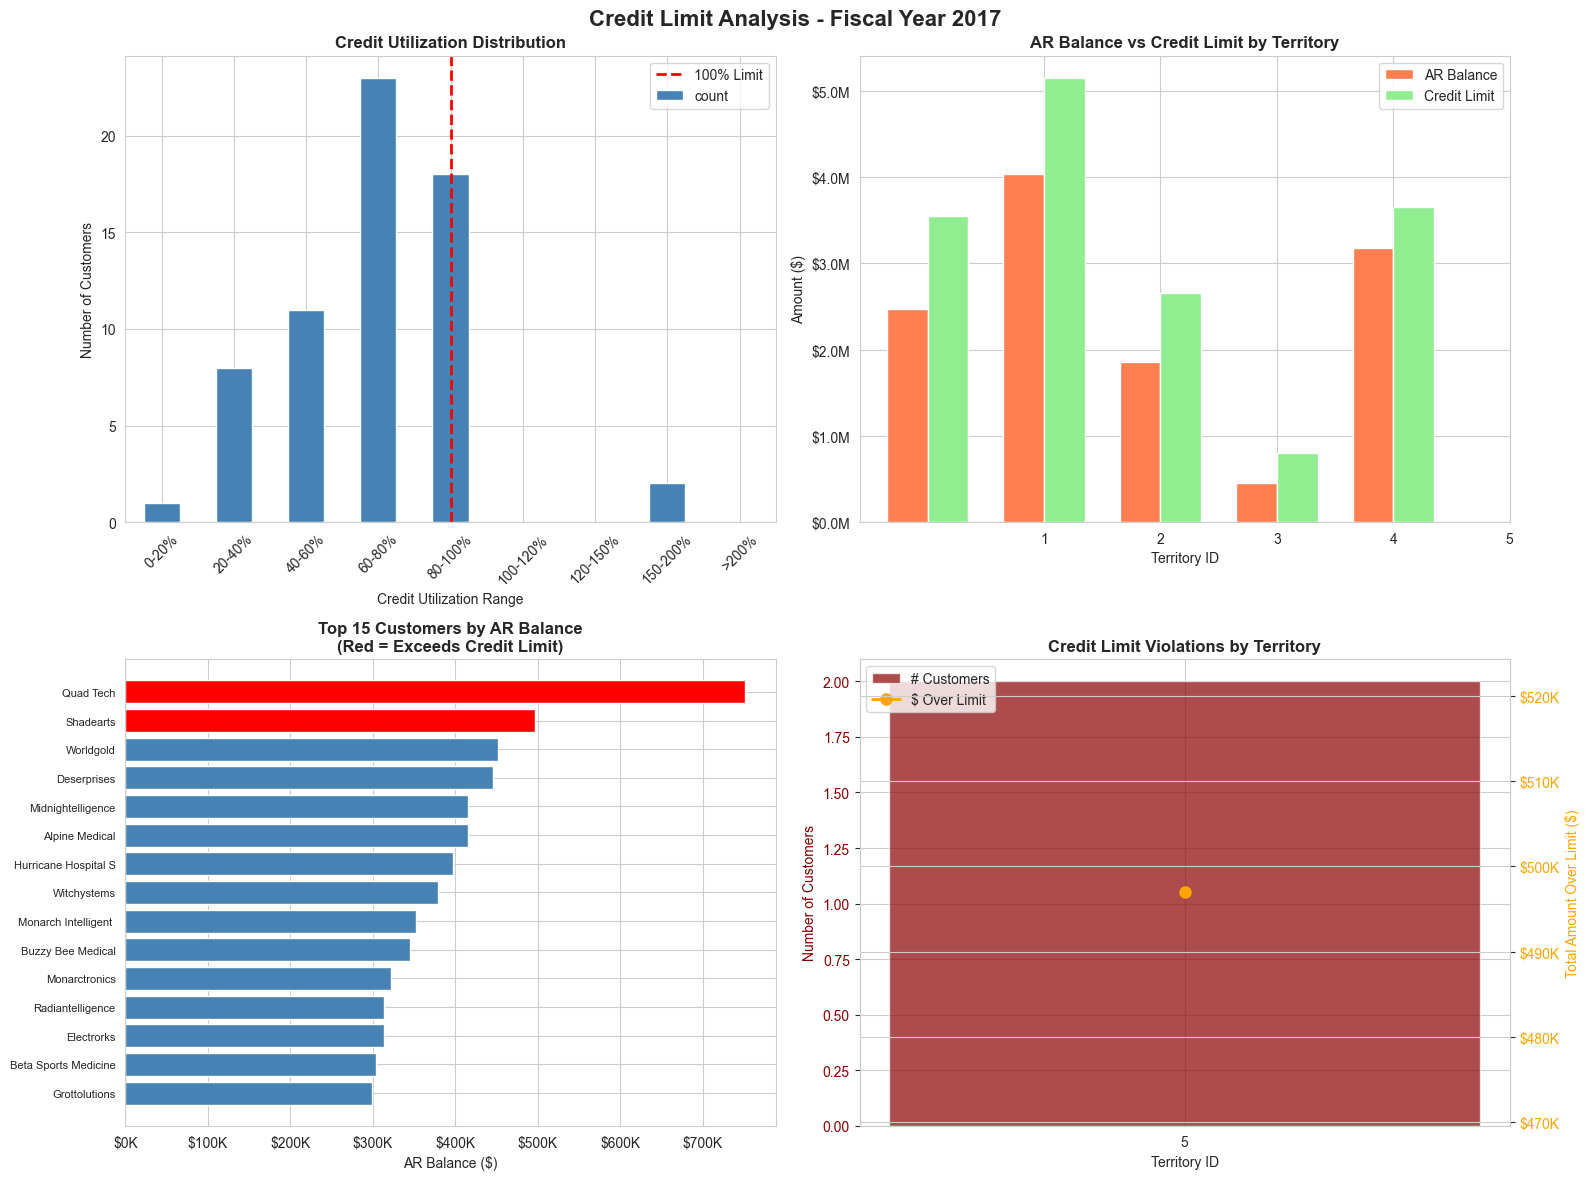

In [10]:
# Create comprehensive credit analysis visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Credit Limit Analysis - Fiscal Year 2017', fontsize=16, fontweight='bold')

# 1. Credit Utilization Distribution
ax1 = axes[0, 0]
utilization_bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.5, 2.0, 5.0]
utilization_labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%', '100-120%', '120-150%', '150-200%', '>200%']
ar_with_credit_limits['UtilizationBin'] = pd.cut(
    ar_with_credit_limits['CreditUtilization'], 
    bins=utilization_bins, 
    labels=utilization_labels,
    include_lowest=True
)
utilization_counts = ar_with_credit_limits['UtilizationBin'].value_counts().sort_index()
utilization_counts.plot(kind='bar', ax=ax1, color='steelblue')
ax1.set_title('Credit Utilization Distribution', fontweight='bold')
ax1.set_xlabel('Credit Utilization Range')
ax1.set_ylabel('Number of Customers')
ax1.axvline(x=4, color='red', linestyle='--', linewidth=2, label='100% Limit')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# 2. AR Balance vs Credit Limit by Territory
ax2 = axes[0, 1]
territory_data = ar_with_credit_limits.groupby('TerritoryID').agg({
    'AR_Balance': 'sum',
    'CredLimit': 'sum'
})
x = np.arange(len(territory_data))
width = 0.35
ax2.bar(x - width/2, territory_data['AR_Balance'], width, label='AR Balance', color='coral')
ax2.bar(x + width/2, territory_data['CredLimit'], width, label='Credit Limit', color='lightgreen')
ax2.set_title('AR Balance vs Credit Limit by Territory', fontweight='bold')
ax2.set_xlabel('Territory ID')
ax2.set_ylabel('Amount ($)')
ax2.set_xticks(x)
ax2.set_xticks(territory_data.index)
ax2.legend()
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# 3. Top 15 Customers by AR Balance
ax3 = axes[1, 0]
top_customers = ar_with_credit_limits.nlargest(15, 'AR_Balance')
colors = ['red' if exceeds else 'steelblue' for exceeds in top_customers['ExceedsLimit']]
ax3.barh(range(len(top_customers)), top_customers['AR_Balance'], color=colors)
ax3.set_yticks(range(len(top_customers)))
ax3.set_yticklabels([name[:20] for name in top_customers['CustName']], fontsize=8)
ax3.set_title('Top 15 Customers by AR Balance\n(Red = Exceeds Credit Limit)', fontweight='bold')
ax3.set_xlabel('AR Balance ($)')
ax3.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e3:.0f}K'))
ax3.invert_yaxis()

# 4. Credit Violations by Territory (if any)
ax4 = axes[1, 1]
if len(credit_violations) > 0:
    violation_by_territory = credit_violations.groupby('TerritoryID').agg({
        'CustID': 'count',
        'AmountOver': 'sum'
    })
    violation_by_territory.columns = ['CustomerCount', 'TotalAmountOver']
    
    x = np.arange(len(violation_by_territory))
    ax4_2 = ax4.twinx()
    
    bars = ax4.bar(x, violation_by_territory['CustomerCount'], color='darkred', alpha=0.7, label='# Customers')
    line = ax4_2.plot(x, violation_by_territory['TotalAmountOver'], color='orange', marker='o', 
                      linewidth=2, markersize=8, label='$ Over Limit')
    
    ax4.set_title('Credit Limit Violations by Territory', fontweight='bold')
    ax4.set_xlabel('Territory ID')
    ax4.set_ylabel('Number of Customers', color='darkred')
    ax4_2.set_ylabel('Total Amount Over Limit ($)', color='orange')
    ax4.set_xticks(x)
    ax4.set_xticklabels(violation_by_territory.index)
    ax4.tick_params(axis='y', labelcolor='darkred')
    ax4_2.tick_params(axis='y', labelcolor='orange')
    ax4_2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e3:.0f}K'))
    
    # Combine legends
    lines1, labels1 = ax4.get_legend_handles_labels()
    lines2, labels2 = ax4_2.get_legend_handles_labels()
    ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
else:
    ax4.text(0.5, 0.5, 'NO CREDIT LIMIT VIOLATIONS\nAll customers within limits', 
             ha='center', va='center', fontsize=14, fontweight='bold', color='green',
             transform=ax4.transAxes)
    ax4.set_title('Credit Limit Violations by Territory', fontweight='bold')
    ax4.axis('off')

plt.tight_layout()

# Save figure
fig_dir = Path('../outputs/figures')
fig_dir.mkdir(parents=True, exist_ok=True)
plt.savefig(fig_dir / 'credit_analysis.png', dpi=300, bbox_inches='tight')
print("Saved credit_analysis.png")

plt.show()


## Summary and Audit Implications


### Control Effectiveness Assessment

**Second Control (Credit Limit Establishment): EFFECTIVE**
- All 73 distributors have documented credit limits in Customer Master
- No sales made without established credit limits
- Credit limits appear reasonable ($50K-$500K range)
- Control operating as designed at year-end

**Third Control (Sales Authorization vs Credit Limit): EFFECTIVE**
- No customers exceeded their credit limits as of 12/31/2017
- Automated control successfully prevented over-limit transactions
- Highest utilization is 99.4% (below 100% threshold)
- Control operating as designed at year-end

### Audit Implications

**Good News:**
- Both tested controls show NO EXCEPTIONS during substantive testing
- This supports the "no exceptions noted" conclusion from interim testing
- Controls appear to be operating effectively through year-end

**Concerns Despite Clean Results:**
- **10 customers have >80% credit utilization** - approaching limits suggests either:
  - Aggressive credit management (maximizing sales)
  - Potential collection issues (customers slow to pay)
  - Credit limits may have been increased to accommodate Q4 sales spike
- **Given the fraud environment (214% Q4 growth, pressure to hit targets):**
  - Clean results could indicate management increased credit limits to bypass controls
  - Need to test WHEN credit limits were set/modified
  - Controls tested at year-end may not reflect Q4 2017 activity

**Assertions Affected:**
- **Valuation (AR):** High credit utilization (>80%) on 10 customers warrants additional collectibility assessment
- **Rights and Obligations:** No issues identified

### Further Testing Recommended

**Critical Follow-Up (Despite No Exceptions):**

1. **Credit Limit Timing Analysis:**
   - Review modification dates in Customer Master (ModifiedDate field)
   - Identify any credit limit increases during Q4 2017
   - Determine who approved limit increases and whether appropriate given sales spike
   - Test if limits were increased BEFORE or AFTER sales occurred
   
2. **High Credit Utilization Customers (>80%):**
   - Focus on 10 customers approaching limits:
     - Hurricane Hospital Supply (99.4%)
     - Luckytechs (99.1%)
     - Griffintube (95.0%)
   - Review subsequent payment history in 2018
   - Assess collectibility for valuation assertion
   - Determine if these customers are also involved in bill-and-hold or Q4 spike

3. **Q4 2017 Specific Testing:**
   - Analyze credit limit status specifically during Q4 2017 (when fraud risk highest)
   - Compare credit limits on 9/30/2017 vs 12/31/2017
   - Test whether automated control operated during roll-forward period
   - Review override logs for credit department during Q4

4. **Management Interview:**
   - Credit department manager: Were any limits increased in Q4 2017?
   - Who has authority to approve credit limit changes?
   - Were there pressure from sales management to increase limits?

**Risk Assessment:**
- Despite clean test results, fraud risk remains HIGH given case context
- Clean results may be "too clean" - warrants skepticism
- Focus testing on TIMING of control operation and potential circumvention
